# 다른 시각화 모듈

* seaborn, pyecharts 모듈

## 그래프 모듈 설치

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt  # 기본 시각화 모듈
import seaborn as sns  # 판다스 등에 특화된 시각화 모듈

In [2]:
import numpy as np
import pandas as pd

In [3]:
import pyecharts.charts as cht # 동적인 시각화 모듈
from pyecharts import options as opts

In [4]:
# pip install pyecharts

## 한글 처리

In [5]:
import sys
from matplotlib import font_manager, rc # 폰트를 설정하기 위해서 사용

In [6]:
if sys.platform == 'darwin': # Mac OS 이름 확인
    path = '/Library/Fonts/AppleGothic.ttf'
elif sys.platform == 'win32': # windows 이름 확인
    path = 'c:/Windows/Fonts/malgun.ttf'
else:
    print('Unknown system...')

font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name) # 한글 폰트 지정
plt.rcParams['axes.unicode_minus'] = False # 폰트를 한글로 설정하면 `-` 값이 처리 되지 않는 문제 해결

## 스타일 처리

In [7]:
from matplotlib import style

In [8]:
style.use('ggplot')

## pie 그래프 그리기

In [9]:
labels = ['삼성전자', 'sk 하이닉스', 'LG 전자', '네이버', '카카오']
ratio = [50, 20, 10, 10, 10]

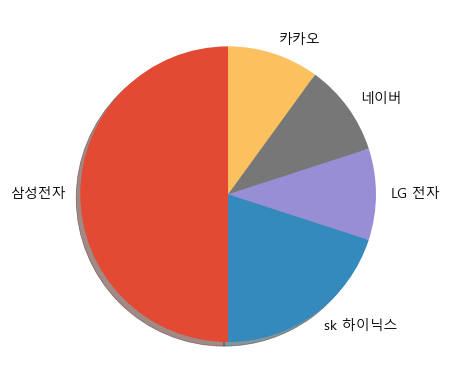

In [10]:
plt.pie(ratio, labels=labels, shadow=True, startangle=90) # startangle=90 그래프를 90도 회전
plt.show()        

### pyecharts로 파이 그래프 그리기

In [11]:
pie = cht.Pie()
pie.add("회사 규모",  [list(z) for z in zip(labels, ratio)], radius=100)
pie.set_global_opts(title_opts=opts.TitleOpts(title="주요 기업", subtitle="2017-2017 Revenue"),
                    toolbox_opts=opts.ToolboxOpts())  # title 설정 및 toolbox 표시하게 설정
#pie.render('pie.html') # html로 만들기
pie.render_notebook() # jupyter notebook에서는 잘되나, jypyterlab에서는 제대로 안됨

In [12]:
pie = cht.Pie()
pie.add("회사 규모",  [list(z) for z in zip(labels, ratio)], radius=[40, 75])
pie.set_global_opts(title_opts=opts.TitleOpts(title="주요 기업", subtitle="2017-2017 Revenue"),
                    toolbox_opts=opts.ToolboxOpts()) 
#pie.render('pie1.html') # html로 만들기
pie.render_notebook() # jupyter notebook에서는 잘되나, jypyterlab에서는 제대로 안됨

## seaborn의 dataset 이용하기

* load_dateaset()도움말에서 참고 
* https://github.com/mwaskom/seaborn-data
* tips: https://rdrr.io/cran/reshape2/man/tips.html 항목 설명

In [13]:
iris = sns.load_dataset('iris') # 분꽃 데이터
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')  # 팁 데이터
flights = sns.load_dataset('flights') # 운송데이터

In [14]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## DataFrame를 이용한 scatter 그래프 그리기(2가지 방법)

* plot()으로 scatter 그래프 그리기
* plot.scatter()로 scatter 그래프 그리기

C:\Users\kmans\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


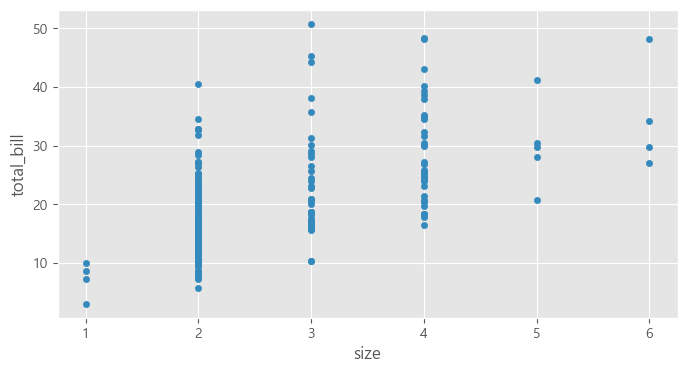

In [15]:
# DataFrame내의 plot으로 scatter 그래프 그리기
tips.plot(x='size', y='total_bill', kind='scatter', figsize=(8,4)) # size는 인원수, total_bill은 세금, kind=그래프 종류
plt.show()

In [16]:
# day의 값 확인
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

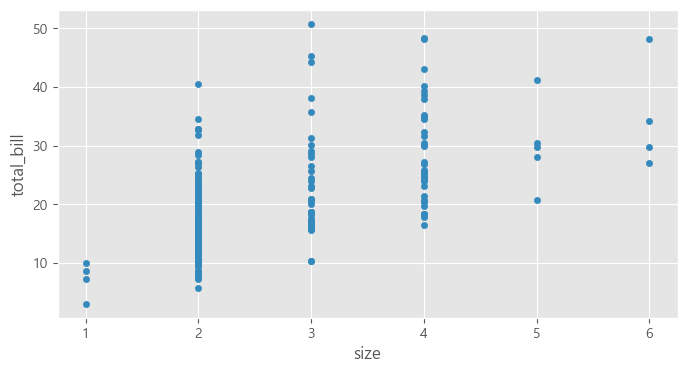

In [17]:
# DataFrame내의 plot.scatter를 이용한 scatter 그래프 그리기
tips.plot.scatter(x='size', y='total_bill', figsize=(8, 4))
plt.show()

## Seaborn 모듈로 점그래프 그리기(sns.stripplot)

* 데이터프레임으로 그래프를 그릴 때 정수나 실수는 축의 정보로 사용 가능하다.
* 그러나, 숫자이외의 문자열등의 다른 정보를 축의 정보로 전달하면 예외가 발생한다.

In [18]:
try:
    tips.plot.statter(x='day', y='total_bill', figsize=(8, 4))
    plt.show()
except Exception as e:
    print(e)

'PlotAccessor' object has no attribute 'statter'


In [19]:
# day의 데이터를 확인-> 요일로 되어 있음
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [20]:
# day의 데이터를 확인-> 요일로 되어 있음
tips['day'].describe

<bound method NDFrame.describe of 0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']>

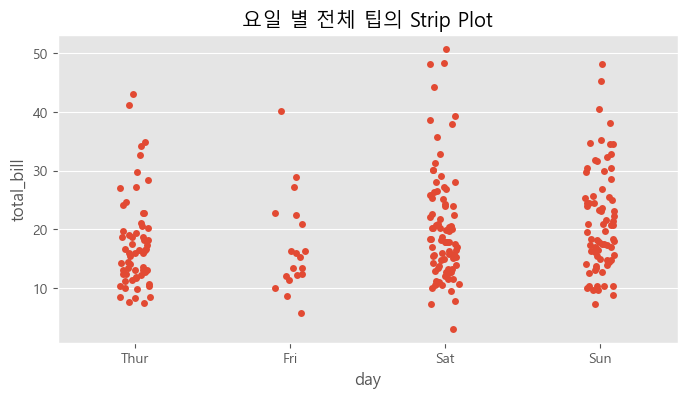

In [21]:
# sns.stripplot로 문자열인 데이터를 이용한 그래프를 그리기
fig, ax = plt.subplots(figsize=(8,4))
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, ax=ax)
plt.title('요일 별 전체 팁의 Strip Plot')
plt.show()

### pyecharts로 점그래프 그리기

In [22]:
scatter = cht.Scatter()  #pyecharts의 Scatter() 객체 사용
scatter.add_xaxis(tips['size'])
scatter.add_yaxis('total_bill', tips['total_bill'], symbol_size=20)
scatter.set_global_opts(title_opts=opts.TitleOpts(title='Tips'),
                        toolbox_opts=opts.ToolboxOpts()) # 타이틀 및 툴박스 표시 설정
scatter.render_notebook()

## box 그래프 그리기

* dataframe의 plot.box를 이용하여 box 그래프 그리기
* sns.boxplot를 이용하여 box 그래프 그리기

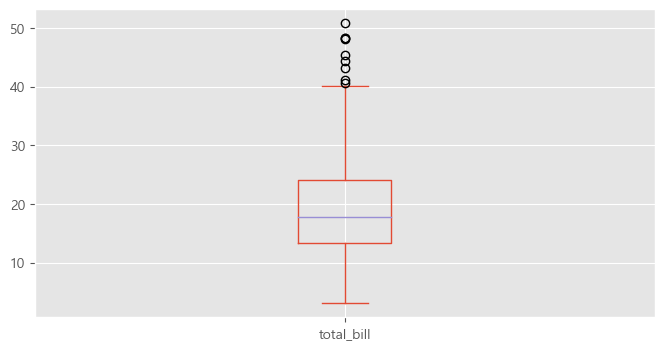

In [23]:
# dataframe의 plot.box를 이용하여 box 그래프 그리기
tips.plot.box(y='total_bill', figsize=(8,4))
plt.show()

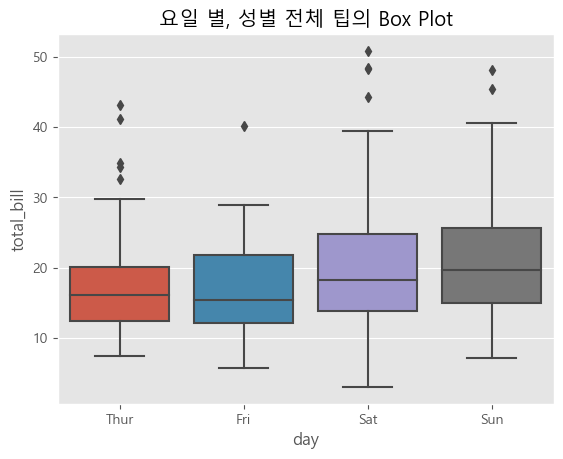

In [24]:
# sns.boxplot를 이용하여 box 그래프 그리기
sns.boxplot(x='day', y='total_bill', data=tips) # figure, axes 없이 바로 그래프를 그렸다.
plt.title('요일 별, 성별 전체 팁의 Box Plot')
plt.show()

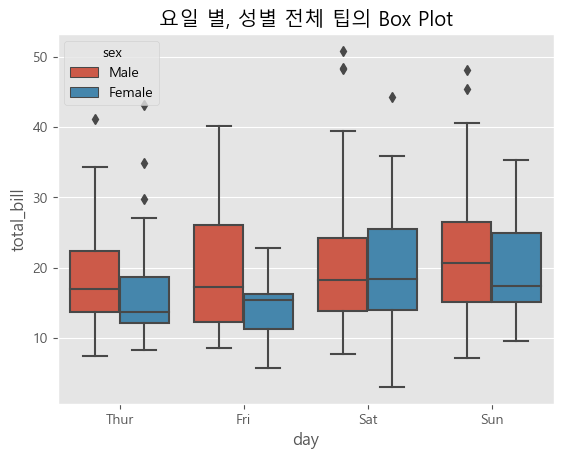

In [25]:
# 요일별, 성별별로 상세화(day에서 성별별로 분리됨)
sns.boxplot(x='day', y='total_bill', hue='sex', data=tips) 
plt.title('요일 별, 성별 전체 팁의 Box Plot')
plt.show()

### pyecharts로 상자 그래프 그리기

In [26]:
# 데이터프레임을 요일별로 그룹화
gr = tips.groupby('day')

In [27]:
# day 안에는 4개의 요일이 들어 있는 것을 확인
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [28]:
# 요일 그룹화 정보 확인
tips['day'].value_counts().index.categories

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

In [29]:
tips['day'].value_counts().index.categories.values

array(['Thur', 'Fri', 'Sat', 'Sun'], dtype=object)

In [30]:
# 요일의 범주를 리스트로 변환해서 저장
a = tips['day'].value_counts().index.categories.values.tolist()
a

['Thur', 'Fri', 'Sat', 'Sun']

In [31]:
# 빈 리스트에 실제 금액이 저장된 total_bill 열의 데이터를 이 법주에 맞춰 분리해 리스트로 저장
y_axis = list()
for v in a:
    y_axis.append(gr.get_group(v)['total_bill'].tolist())
    
y_axis

[[27.2,
  22.76,
  17.29,
  19.44,
  16.66,
  10.07,
  32.68,
  15.98,
  34.83,
  13.03,
  18.28,
  24.71,
  21.16,
  10.65,
  12.43,
  24.08,
  11.69,
  13.42,
  14.26,
  15.95,
  12.48,
  29.8,
  8.52,
  14.52,
  11.38,
  22.82,
  19.08,
  20.27,
  11.17,
  12.26,
  18.26,
  8.51,
  10.33,
  14.15,
  16.0,
  13.16,
  17.47,
  34.3,
  41.19,
  27.05,
  16.43,
  8.35,
  18.64,
  11.87,
  9.78,
  7.51,
  19.81,
  28.44,
  15.48,
  16.58,
  7.56,
  10.34,
  43.11,
  13.0,
  13.51,
  18.71,
  12.74,
  13.0,
  16.4,
  20.53,
  16.47,
  18.78],
 [28.97,
  22.49,
  5.75,
  16.32,
  22.75,
  40.17,
  27.28,
  12.03,
  21.01,
  12.46,
  11.35,
  15.38,
  12.16,
  13.42,
  8.58,
  15.98,
  13.42,
  16.27,
  10.09],
 [20.65,
  17.92,
  20.29,
  15.77,
  39.42,
  19.82,
  17.81,
  13.37,
  12.69,
  21.7,
  19.65,
  9.55,
  18.35,
  15.06,
  20.69,
  17.78,
  24.06,
  16.31,
  16.93,
  18.69,
  31.27,
  16.04,
  38.01,
  26.41,
  11.24,
  48.27,
  20.29,
  13.81,
  11.02,
  18.29,
  17.59,
  20.08

In [32]:
# list를 데이터프레임 객체로 변환(결측값을 처리하기 위해서)
y_axis_ = pd.DataFrame(y_axis) 
y_axis_.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,27.20,22.76,17.29,19.44,16.66,10.07,32.68,15.98,34.83,13.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.97,22.49,5.75,16.32,22.75,40.17,27.28,12.03,21.01,12.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20.65,17.92,20.29,15.77,39.42,19.82,17.81,13.37,12.69,21.70,...,10.77,15.53,10.07,12.6,32.83,35.83,29.03,27.18,22.67,17.82
3,16.99,10.34,21.01,23.68,24.59,25.29,8.77,26.88,15.04,14.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# 결측값을 0으로 채움
y_axis_ = y_axis_.fillna(0)
y_axis_.head()

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,27.20,22.76,17.29,19.44,16.66,10.07,32.68,15.98,34.83,13.03,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,28.97,22.49,5.75,16.32,22.75,40.17,27.28,12.03,21.01,12.46,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,20.65,17.92,20.29,15.77,39.42,19.82,17.81,13.37,12.69,21.70,...,10.77,15.53,10.07,12.6,32.83,35.83,29.03,27.18,22.67,17.82
3,16.99,10.34,21.01,23.68,24.59,25.29,8.77,26.88,15.04,14.78,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00


In [34]:
# 데이터프레임을 list로 변환
y_axis_t = []
for i in range(4): # 요일의 범주가 4개 이어서 4
    y_axis_t.append(y_axis_.iloc[i].tolist())
y_axis_t

[[27.2,
  22.76,
  17.29,
  19.44,
  16.66,
  10.07,
  32.68,
  15.98,
  34.83,
  13.03,
  18.28,
  24.71,
  21.16,
  10.65,
  12.43,
  24.08,
  11.69,
  13.42,
  14.26,
  15.95,
  12.48,
  29.8,
  8.52,
  14.52,
  11.38,
  22.82,
  19.08,
  20.27,
  11.17,
  12.26,
  18.26,
  8.51,
  10.33,
  14.15,
  16.0,
  13.16,
  17.47,
  34.3,
  41.19,
  27.05,
  16.43,
  8.35,
  18.64,
  11.87,
  9.78,
  7.51,
  19.81,
  28.44,
  15.48,
  16.58,
  7.56,
  10.34,
  43.11,
  13.0,
  13.51,
  18.71,
  12.74,
  13.0,
  16.4,
  20.53,
  16.47,
  18.78,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [28.97,
  22.49,
  5.75,
  16.32,
  22.75,
  40.17,
  27.28,
  12.03,
  21.01,
  12.46,
  11.35,
  15.38,
  12.16,
  13.42,
  8.58,
  15.98,
  13.42,
  16.27,
  10.09,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

In [35]:
# 그래프 그리기
boxplot = cht.Boxplot()

boxplot.add_xaxis(tips['day'].value_counts().index.categories.values.tolist()) # x축은 요일
boxplot.add_yaxis('total bill', y_axis_t) # y축은 요일별로 가진 total_bill
boxplot.set_global_opts(title_opts=opts.TitleOpts(title='Tips'),
                        toolbox_opts=opts.ToolboxOpts())
boxplot.render_notebook()